In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
dir_folder = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/"
files = [
    'Evaluation_exp1_linear.csv',
    'Evaluation_exp1_power.csv',
    'Evaluation_exp1_partial.csv',
    'Evaluation_exp1_partial1.csv',
    'Evaluation_exp2_linear.csv',
    'Evaluation_exp2_power.csv',
    'Evaluation_exp2_partial.csv',
    'Evaluation_exp2_partial1.csv',
    'Evaluation_exp3_linear.csv',
    'Evaluation_exp3_power.csv',
    'Evaluation_exp3_partial.csv'
]

dataframes = []

for file in files:
    filepath = os.path.join(dir_folder, file)
    df = pd.read_csv(filepath)
    dataframes.append(df)


df = pd.concat(dataframes, ignore_index=True)
# print(df)



dir_folder = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/info_syntheticData/"
files = [
    'info_exp1_linear_result.csv',
    'info_exp1_power_result.csv',
    'info_exp1_partial_result.csv',
    'info_exp1_partial1_result.csv',
    'info_exp2_linear_result.csv',
    'info_exp2_power_result.csv',
    'info_exp2_partial_result.csv',
    'info_exp2_partial1_result.csv',
    'info_exp3_linear_result.csv',
    'info_exp3_power_result.csv',
    'info_exp3_partial_result.csv'
]

dataframes = []

for file in files:
    filepath = os.path.join(dir_folder, file)
    df2 = pd.read_csv(filepath)
    dataframes.append(df2)


df2 = pd.concat(dataframes, ignore_index=True)
# print(df2)
new_df2 = df2[['experiment','fname', 'Function', 'initiallocation','intialscale','initialshape','SlopeData']]

merged_df = pd.merge(df, new_df2, on=['experiment', 'fname'])

print(merged_df)

     MAE_mwoutlier1  MAE_mwoutlier2   MAE_mw  RMSE_mwoutlier1  \
0           1095.79          709.72   680.21          1289.82   
1           1296.71         1243.87  1150.69          1547.95   
2            938.51          878.09   906.37          1140.44   
3           2493.34         2290.17  1695.89          2759.48   
4           1604.45         1620.71  1307.86          2014.37   
..              ...             ...      ...              ...   
489         1573.34         2119.89  1572.47          1749.19   
490         1732.78         1614.55  1183.51          1971.36   
491           18.48           17.57    15.13            23.18   
492           24.83           20.85    19.55            28.30   
493           14.52           15.55     9.52            15.85   

     RMSE_mwoutlier2  RMSE_mw  PBIASpercent_mwoutlier1  \
0             959.69   880.35                     -4.7   
1            1588.96  1412.64                     -3.5   
2            1118.86  1145.64                

In [ ]:
merged_df['riversid'] = merged_df.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)
# Create a mapping dictionary
river_mapping = {
    76.0: 'River.I',
    1950.0: 'River.II',
    4546.0: 'River.III',
    12966.0: 'River.IV',
    25979.0: 'River.V',
    32163.0: 'River.VI'
}

# Assign new river names based on the mapping dictionary
merged_df['rivers'] = merged_df['riversid'].map(river_mapping)

experimentMapping = {
    'ChangingLocation': 'Time-varying Location',
    'ChangingScale': 'Time-varying Scale',
    'ChangingLocationScale': 'Time-varying Both'
}

# Assign new river names based on the mapping dictionary
merged_df['experimentnew'] = merged_df['experiment'].map(experimentMapping)


# Check the unique river names in the new dataframe
unique_rivers = merged_df['rivers'].unique()
print(merged_df)

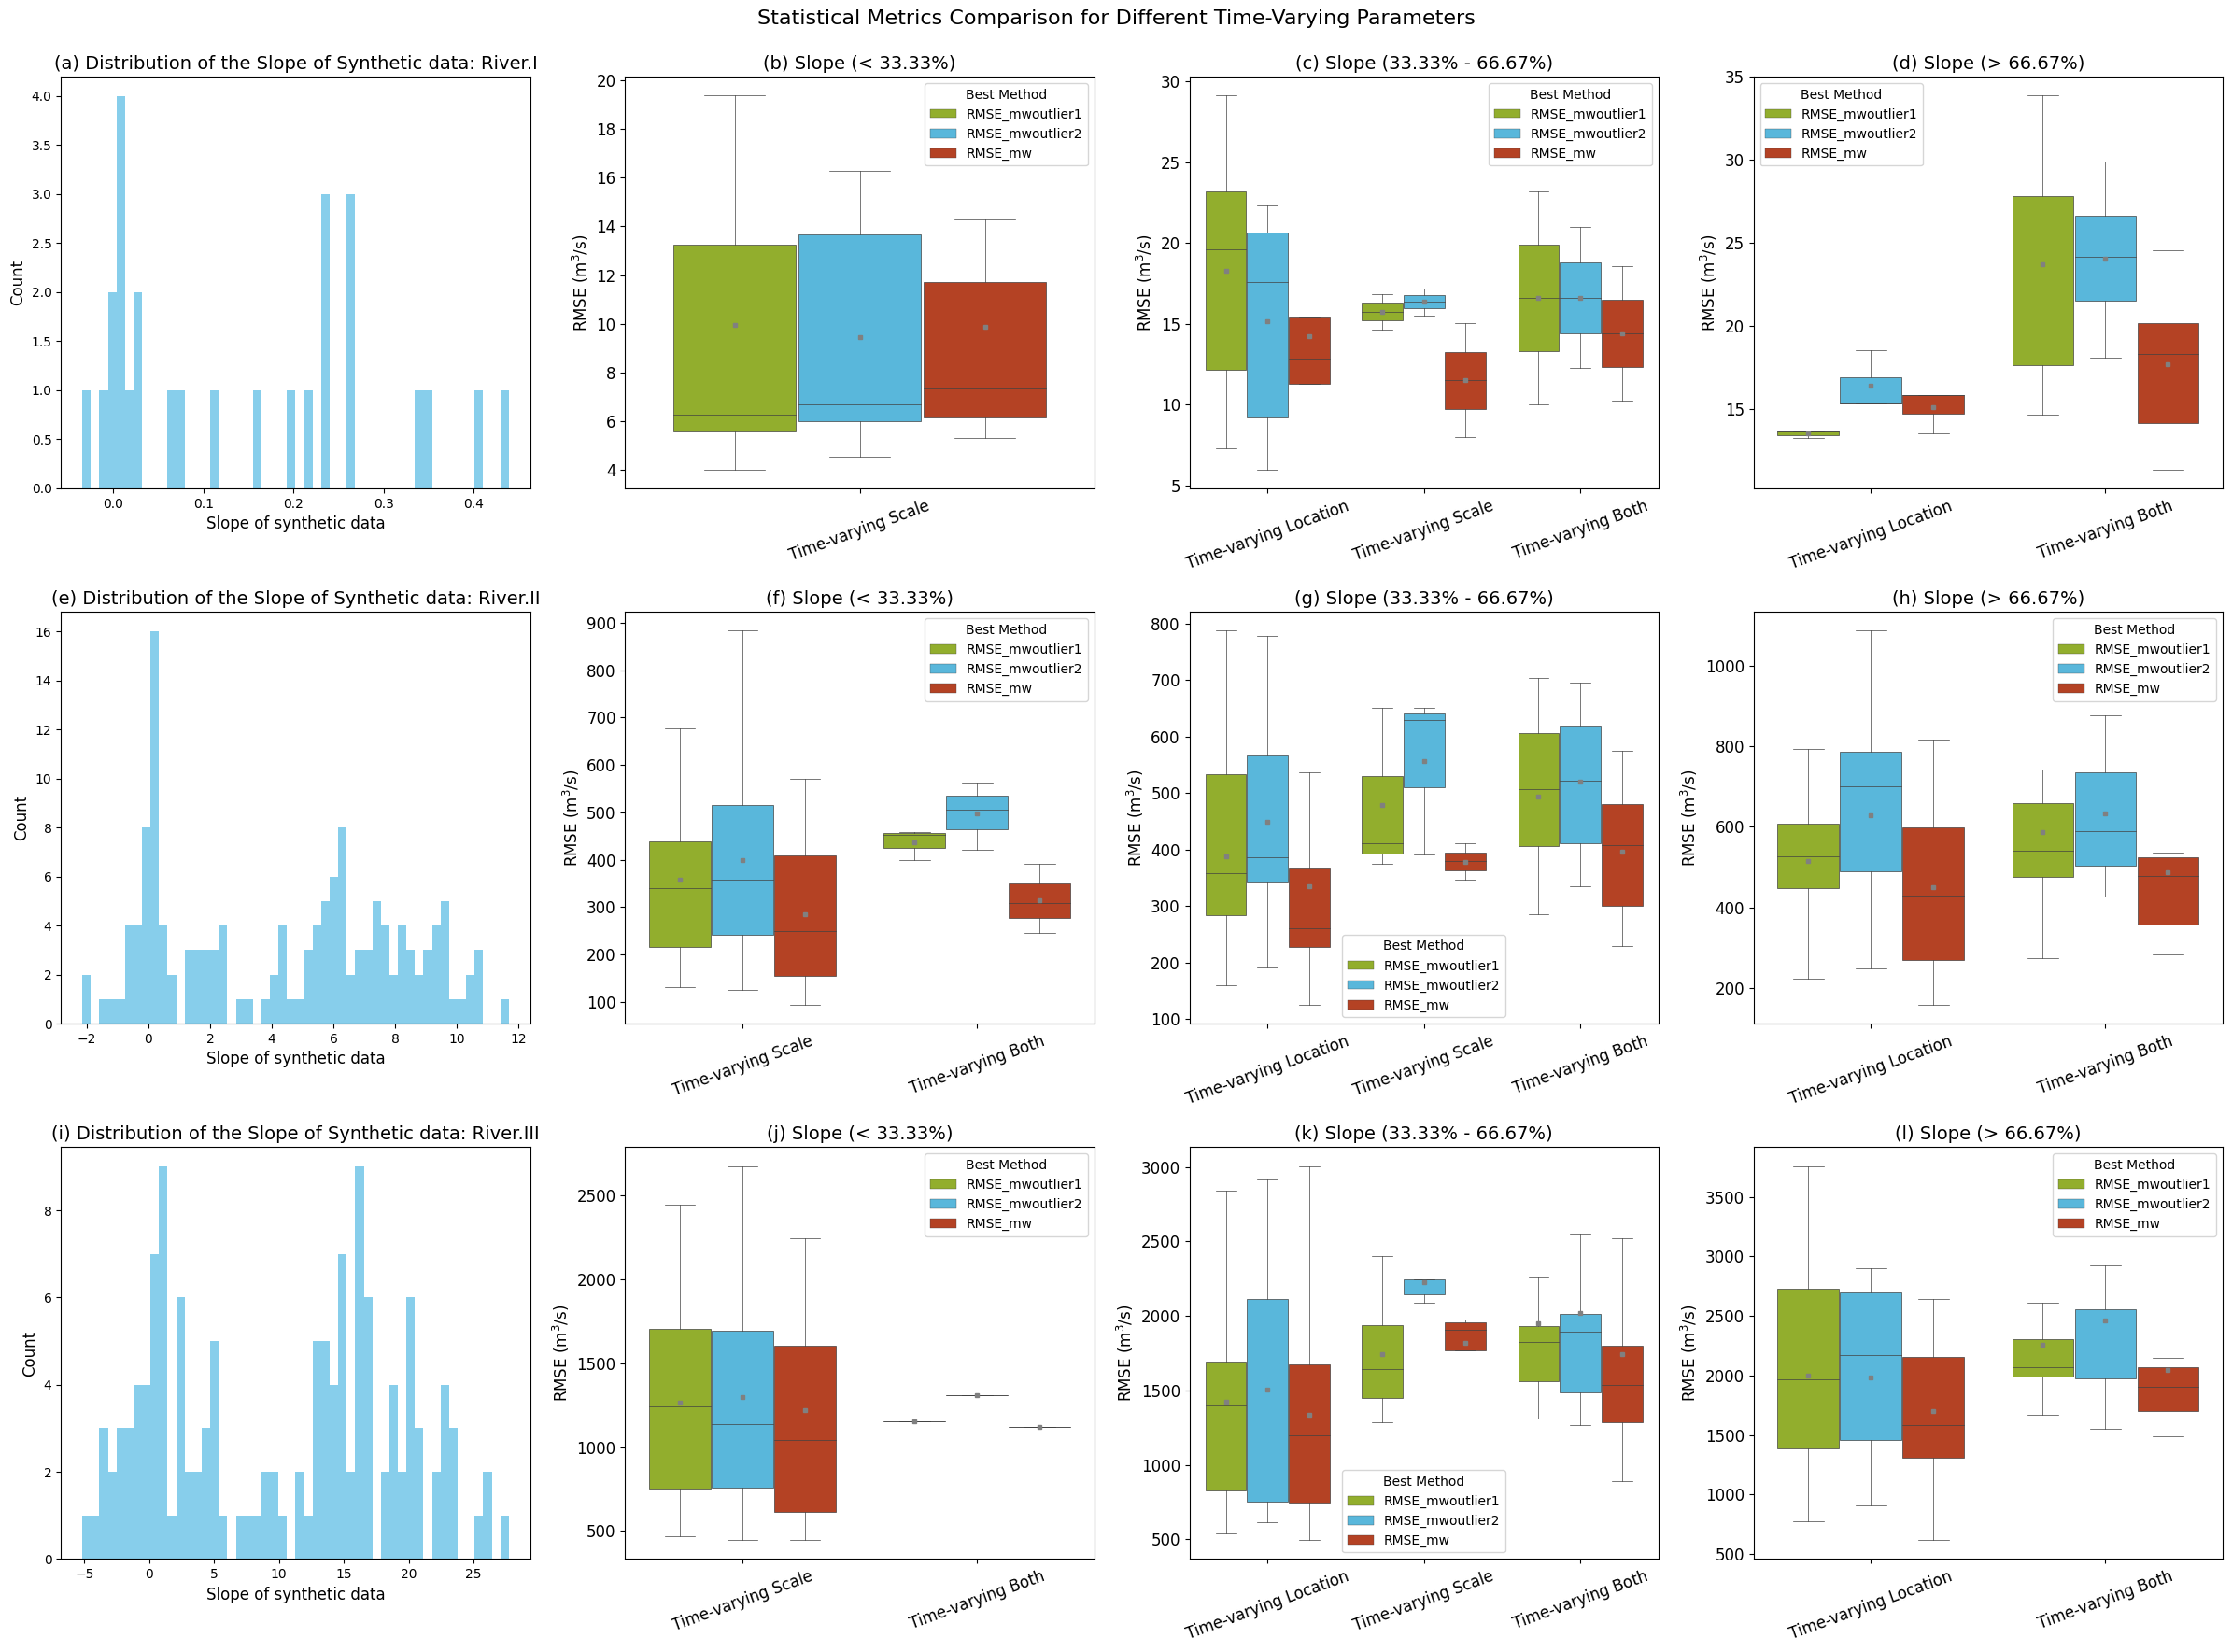

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the id_vars and value_vars
id_vars = ['experimentnew']
value_vars_mae = ['MAE_mwoutlier1', 'MAE_mwoutlier2', 'MAE_mw']
value_vars_rmse = ['RMSE_mwoutlier1', 'RMSE_mwoutlier2', 'RMSE_mw']

# Define a custom color palette
custom_palette = ["#9ec417", "#44c1f0", "#cc340c"]

# Create a 3x4 subplot figure
fig, axs = plt.subplots(3, 4, figsize=(24, 18))

# Rivers and corresponding indices
rivers = ['River.I', 'River.II', 'River.III']
# rivers = ['River.IV', 'River.V', 'River.VI']

indices = [(0, 0), (1, 0), (2, 0)]
subplot_labels11 = ['(b)', '(c)', '(d)']
subplot_labels12 = ['(f)', '(g)', '(h)']
subplot_labels13 = ['(j)', '(k)', '(l)']
subplot_labels2 = ['(a)',  '(e)',  '(i)' ]
# Iterate over rivers and plot the figures
for river, index in zip(rivers, indices):
    # Filter data for the current river
    # print(index)
    df_range = merged_df[merged_df['rivers'] == river]

    # Divide slope values into three groups
    slope_ranges = np.percentile(df_range['SlopeData'], [33.33, 66.67])
    range_labels = ['(< 33.33%)', '(33.33% - 66.67%)', '(> 66.67%)']

    # Plot the histogram in the first subplot
    axs[index].hist(df_range['SlopeData'], bins=50, color='skyblue')
    axs[index].set_xlabel('Slope of synthetic data', fontsize=12)
    axs[index].set_ylabel('Count', fontsize=12)
    axs[index].set_title(f'{subplot_labels2[index[0]]} Distribution of the Slope of Synthetic data: {river}', fontsize=14)

    # Iterate over the remaining subplots and plot the boxplots
    for i, ax in enumerate(axs[index[0], index[1]+1:], start=1):
        if i == 1:
            # Filter data for slope values less than the lower range limit
            df_slope_range = df_range[df_range['SlopeData'] < slope_ranges[0]]
        elif i == 2:
            # Filter data for slope values between the lower and upper range limits
            df_slope_range = df_range[(df_range['SlopeData'] >= slope_ranges[0]) & (df_range['SlopeData'] <= slope_ranges[1])]
        elif i == 3:
            # Filter data for slope values greater than the upper range limit
            df_slope_range = df_range[df_range['SlopeData'] > slope_ranges[1]]

        # Reshape the dataframe for MAE
        reshaped_df_mae = pd.melt(df_slope_range, id_vars=id_vars, value_vars=value_vars_rmse, var_name='Best Method', value_name='RMSE_values')

        # Create the boxplot for MAE with the custom color palette
        sns.boxplot(x=reshaped_df_mae['experimentnew'], y=reshaped_df_mae['RMSE_values'], hue=reshaped_df_mae['Best Method'], showfliers=False, showmeans=True,
                    meanprops={"marker": "s",
                               "markerfacecolor": "grey",
                               "markeredgecolor": "grey",
                               "markersize": "3"},
                    palette=custom_palette, color='lightgrey', linewidth=0.5, ax=ax)

        # Set subplot title and labels for MAE
        # subplot_label = subplot_labels[i+2]  # Get the corresponding label for the subplot
        if (index[0]==0):
            newlabels = subplot_labels11
        elif(index[0]==1):
            newlabels = subplot_labels12
        elif(index[0]==2):
            newlabels = subplot_labels13


        ax.set_title(f"{newlabels[i-1]} Slope {range_labels[i-1]}", fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('RMSE (m$^3$/s)', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20)


# Adjust spacing between subplots

fig.suptitle('Statistical Metrics Comparison for Different Time-Varying Parameters', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.94, hspace=0.3)

plt.savefig(f'/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/figures/GEV_results/f166_river010203RMSE.png', dpi=300)
# Show the combined figure
plt.show()


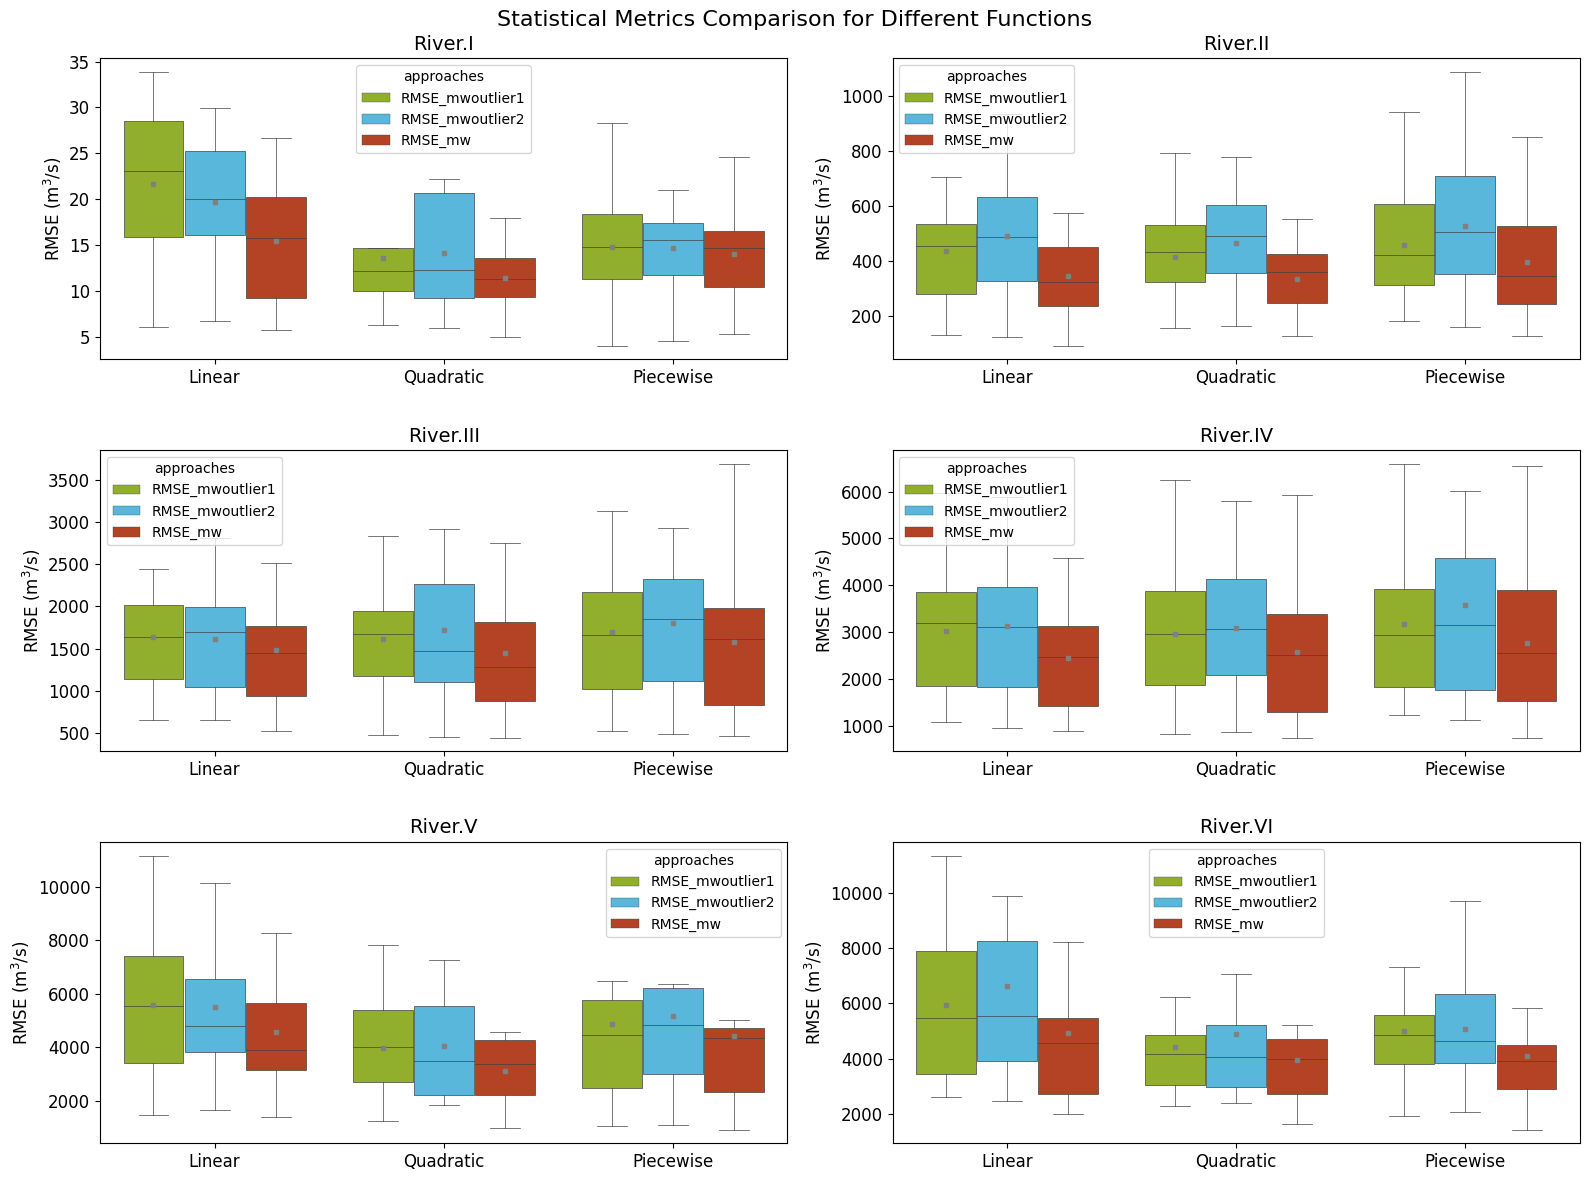

In [75]:
id_vars = ['functions']
value_vars_mae = ['MAE_mwoutlier1', 'MAE_mwoutlier2', 'MAE_mw']
value_vars_rmse = ['RMSE_mwoutlier1', 'RMSE_mwoutlier2', 'RMSE_mw']

# Define a custom color palette
custom_palette = ["#9ec417", "#44c1f0", "#cc340c"]


# Rivers and corresponding indices
riversss = ['River.I', 'River.II', 'River.III','River.IV', 'River.V', 'River.VI']

# Create a 2x2 subplot figure
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

# Iterate over the location values and plot the boxplots
for i, rive in enumerate(riversss):
    # Filter data based on location
    new_df = merged_df[merged_df['rivers'] == rive]

    # Reshape the dataframe
    reshaped_df = pd.melt(new_df, id_vars=id_vars, value_vars=value_vars_rmse, var_name='approaches', value_name='values')
    # print(reshaped_df)

    # Select the corresponding subplot for the current location value
    ax = axs[i // 2, i % 2]

    # Create the boxplot with the custom color palette
    sns.boxplot(x=reshaped_df['functions'], y=reshaped_df['values'], hue=reshaped_df['approaches'], showfliers=False, showmeans=True,
                meanprops={"marker": "s",
                           "markerfacecolor": "grey",
                           "markeredgecolor": "grey",
                           "markersize": "3"},
                palette=custom_palette, color='lightgrey', linewidth=0.5, ax=ax)

    # Set subplot title and labels
    ax.set_title(f"{rive}", fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('RMSE (m$^3$/s)', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

fig.suptitle('Statistical Metrics Comparison for Different Functions', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.94, hspace=0.3)

plt.savefig(f'/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/figures/GEV_results/f166_FunctionRMSE.png', dpi=300)
# Show the combined figure
plt.show()

In [79]:
print(merged_df)

     MAE_mwoutlier1  MAE_mwoutlier2   MAE_mw  RMSE_mwoutlier1  \
0           1095.79          709.72   680.21          1289.82   
1           1296.71         1243.87  1150.69          1547.95   
2            938.51          878.09   906.37          1140.44   
3           2493.34         2290.17  1695.89          2759.48   
4           1604.45         1620.71  1307.86          2014.37   
..              ...             ...      ...              ...   
489         1573.34         2119.89  1572.47          1749.19   
490         1732.78         1614.55  1183.51          1971.36   
491           18.48           17.57    15.13            23.18   
492           24.83           20.85    19.55            28.30   
493           14.52           15.55     9.52            15.85   

     RMSE_mwoutlier2  RMSE_mw  PBIASpercent_mwoutlier1  \
0             959.69   880.35                     -4.7   
1            1588.96  1412.64                     -3.5   
2            1118.86  1145.64                